In [121]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [122]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv('injury_data_updated copy.csv')
df.head()

,Unnamed: 0,Season Year,Week,Team Name,Team City,Player,Player Jersey,Position,Injury Status,Injury Status Date,Practice Status,Injury Type
0,0,2023.0,1.0,Cowboys,Dallas,Jourdan Lewis,2.0,CB,NaN,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
1,1,2023.0,1.0,Cowboys,Dallas,Tyler Smith,73.0,OL,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Hamstring
2,2,2023.0,1.0,Cowboys,Dallas,Sam Williams,54.0,DE,Questionable,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
3,3,2023.0,1.0,Cowboys,Dallas,Donovan Wilson,6.0,SAF,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Calf
4,4,2023.0,1.0,Cowboys,Dallas,Malik Hooker,28.0,SAF,Questionable,2023-09-09T00:00:00+00:00,Did Not Participate In Practice,Illness


In [123]:
injury_counts_by_jersey_number = df.groupby('Player Jersey')['Injury Type'].count()
injury_counts_by_jersey_number

Player Jersey
0.0     58
1.0     51
2.0     34
3.0     39
4.0     51
        ..
95.0    27
96.0    25
97.0    37
98.0    44
99.0    37
Name: Injury Type, Length: 100, dtype: int64

In [124]:
injury_counts_by_jersey_number.describe()['Injury Type']

KeyError: 'Injury Type'

In [125]:
# Identify the jersey number with the highest number of injuries
most_injuries_number = injury_counts_by_jersey_number.idxmax()
most_injuries_count = injury_counts_by_jersey_number.max()
print(f"The jersey number with the highest number of injuries: #{most_injuries_number} ({most_injuries_count} injuries)")

The jersey number with the highest number of injuries: #23.0 (69 injuries)


In [126]:
# Group the data by the 'Team' column and count the number of injuries
injury_counts_by_jersey_number = df.groupby('Player Jersey')['Injury Type'].count().reset_index()

In [127]:
# Rename columns
injury_counts_by_jersey_number.columns = ['Player Jersey', 'Injury Type']

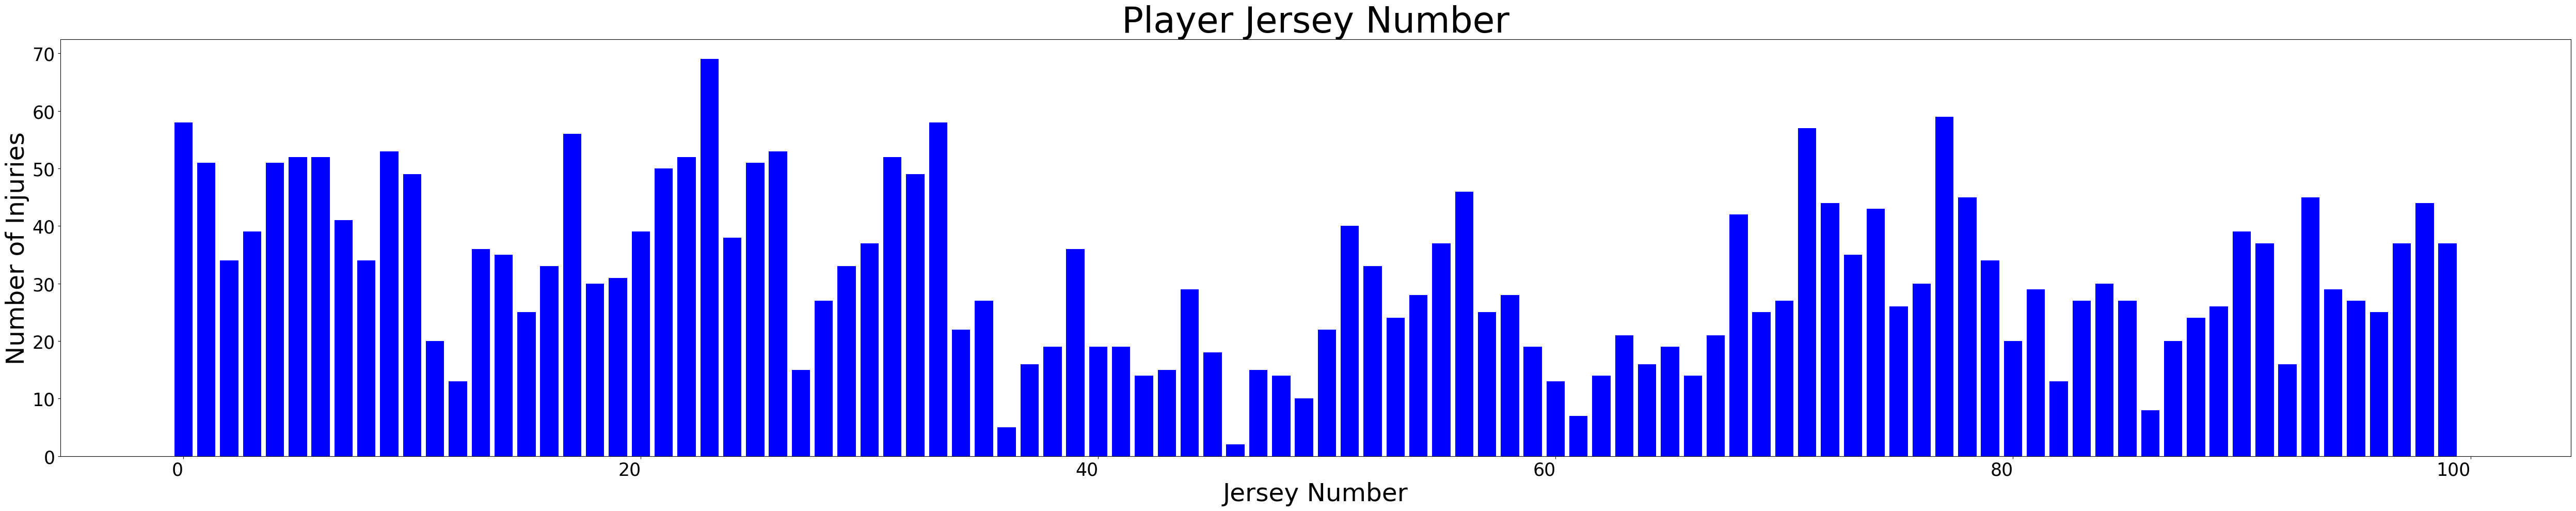

In [128]:
# Create a Bar Chart   
plt.figure(figsize=(50, 10))
plt.bar(injury_counts_by_jersey_number['Player Jersey'], injury_counts_by_jersey_number['Injury Type'], color='blue')

# Add labels and title
plt.xlabel('Jersey Number', fontsize=35)
plt.ylabel('Number of Injuries', fontsize=35)
plt.title('Player Jersey Number', fontsize=50)
plt.xticks(rotation=0, ha='right',fontsize=25)
plt.yticks(rotation=0, ha='right',fontsize=25)

# Sort the DataFrame by Injury Type in descending order
injury_counts_by_jersey_number = injury_counts_by_jersey_number.sort_values(by='Injury Type', ascending=False)

# Display the bar chart
plt.tight_layout()
plt.show()

In [129]:
# correlation coefficient between jersey number and injuries
for column in injury_counts_by_jersey_number.columns[1:]:  # Exclude 'Player_Jersey' column
    r_value, _ = pearsonr(injury_counts_by_jersey_number['Player Jersey'], injury_counts_by_jersey_number[column])
    print(f"The correlation coefficient for jersey number and being injured is: {r_value}")

The correlation coefficient for jersey number and being injured is: -0.2829359907482925


In [130]:
# Create bins in which to place values based upon IMDB vote count
bins = [0, 25, 50, 75, 100]

# Create labels for these bins
group_labels = ["0 to 24", "25 to 49", "50 to 74", "75 to 99"]

In [131]:
# Slice the data and place it into bins
pd.cut(df["Player Jersey"], bins, labels=group_labels)

0        0 to 24
1       50 to 74
2       50 to 74
3        0 to 24
4       25 to 49
          ...   
3145    75 to 99
3146    50 to 74
3147     0 to 24
3148    75 to 99
3149    25 to 49
Name: Player Jersey, Length: 3150, dtype: category
Categories (4, object): ['0 to 24' < '25 to 49' < '50 to 74' < '75 to 99']

In [132]:
# Place the data series into a new column inside of the DataFrame
df["Player Jersey"] = pd.cut(df["Player Jersey"], bins, labels=group_labels)
df.head()

,Unnamed: 0,Season Year,Week,Team Name,Team City,Player,Player Jersey,Position,Injury Status,Injury Status Date,Practice Status,Injury Type
0,0,2023.0,1.0,Cowboys,Dallas,Jourdan Lewis,0 to 24,CB,NaN,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
1,1,2023.0,1.0,Cowboys,Dallas,Tyler Smith,50 to 74,OL,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Hamstring
2,2,2023.0,1.0,Cowboys,Dallas,Sam Williams,50 to 74,DE,Questionable,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
3,3,2023.0,1.0,Cowboys,Dallas,Donovan Wilson,0 to 24,SAF,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Calf
4,4,2023.0,1.0,Cowboys,Dallas,Malik Hooker,25 to 49,SAF,Questionable,2023-09-09T00:00:00+00:00,Did Not Participate In Practice,Illness


In [133]:
injury_counts_by_jersey_number_bin = df.groupby('Player Jersey')['Injury Type'].count()
injury_counts_by_jersey_number_bin

C:\Users\mcmul\AppData\Local\Temp\ipykernel_27156\2510619656.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  injury_counts_by_jersey_number_bin = df.groupby('Player Jersey')['Injury Type'].count()


Player Jersey
0 to 24     1034
25 to 49     626
50 to 74     704
75 to 99     728
Name: Injury Type, dtype: int64

In [134]:
injury_counts_by_jersey_number_bin = {
    '0-24': 1034,
    '25-49': 626,
    '50-74': 704,
    '75-99': 728
}

In [135]:
# Extract labels and values from the dictionary
labels = list(injury_counts_by_jersey_number_bin.keys())
sizes = list(injury_counts_by_jersey_number_bin.values())

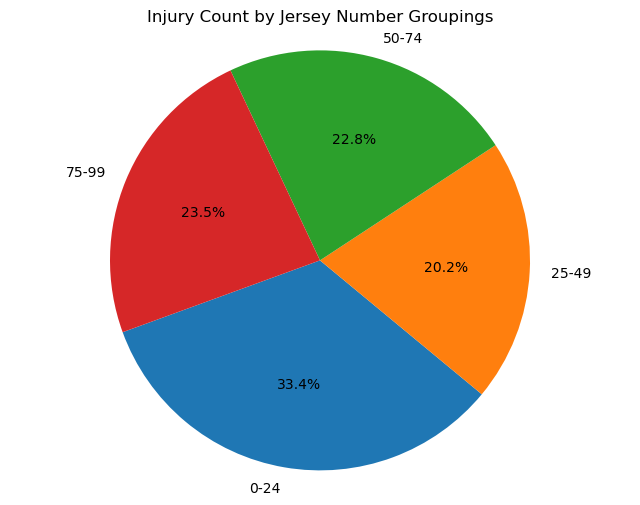

In [136]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)

# Add a title
plt.title('Injury Count by Jersey Number Groupings')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()